Hello PySB! (i.e. hello world) A simple model with a reversible binding rule.
(This is the example shown on the pysb.org home page.)

Simulating...


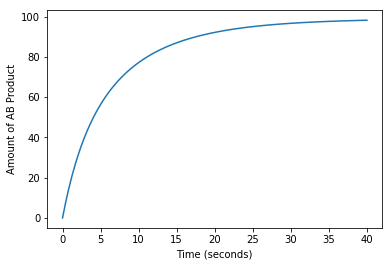

In [11]:
"""Hello PySB! (i.e. hello world) A simple model with a reversible binding rule.
(This is the example shown on the pysb.org home page.)
"""

from __future__ import print_function
from pysb import *

Model()

# Declare the molecules of interest
Monomer('A', ['s'])
Monomer('B', ['s'])

# Declare the parameters, kf = forward rate constant, kr = reverse rate constant
Parameter('A_0', 100)
Parameter('B_0', 200)
Parameter('kf', 1e-3)
Parameter('kr', 1e-3)

# Declare the initial conditions
Initial(A(s=None), A_0)
Initial(B(s=None), B_0)

# Declare the binding rule
Rule('A_binds_B', A(s=None) + B(s=None) != A(s=1) % B(s=1), kf, kr)

# Observe the complex
Observable('AB', A(s=1) % B(s=1))

if __name__ == '__main__':
    from numpy import linspace
    from matplotlib.pyplot import plot, xlabel, ylabel, show
    from pysb.simulator import ScipyOdeSimulator
    print(__doc__)
    # Simulate the model through 40 seconds
    time = linspace(0, 40, 100)
    print("Simulating...")
    x = ScipyOdeSimulator(model).run(tspan=time).all
    # Plot the trajectory of LR
    plot(time, x['AB'])
    xlabel('Time (seconds)')
    ylabel('Amount of AB Product')
    show()